In [13]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree

import SweetSpotPrediction as ssp

# 02 Base model
A simiple model to help understand the data (and help with feature engineering in 01)

*Note: Run 01 to build the .csv files needed*

In [14]:
df = pd.read_csv('ClassificationData.csv')
df.head()

,Unnamed: 0,XPos,YPos,Thickness,AvgNTG,AvgPerm,AvgPoro,NetPerm,SweetSpot,WellPresent
0,172,452050.0,6780950.0,2.535993,0.487495,522.118372,0.161892,1316.895444,1,0
1,173,452050.0,6781000.0,5.272397,0.505895,672.209589,0.158925,2556.454528,1,0
2,174,452050.0,6781050.0,5.555539,0.607166,708.849096,0.166871,3012.225791,0,0
3,175,452050.0,6781100.0,4.928132,0.740983,605.196035,0.160425,2504.174453,0,0
4,176,452050.0,6781150.0,4.036606,0.799833,319.160790,0.141114,1195.540589,0,0


In [15]:
df.describe()

,Unnamed: 0,XPos,YPos,Thickness,AvgNTG,AvgPerm,AvgPoro,NetPerm,SweetSpot,WellPresent
count,10838.000000,10838.000000,1.083800e+04,10838.000000,10838.000000,10838.000000,10838.000000,10838.000000,10838.000000,10838.000000
mean,13646.595682,456112.723750,6.784330e+06,95.699724,0.605208,208.816756,0.145924,6901.195967,0.250692,0.000369
std,4836.368951,1458.884077,1.996730e+03,51.533564,0.142996,218.944614,0.030702,5962.139015,0.433431,0.019209
min,172.000000,452050.000000,6.780650e+06,0.002956,0.000554,0.486736,0.014187,2.999792,0.000000,0.000000
25%,10306.250000,455100.000000,6.782650e+06,54.844682,0.537493,110.933804,0.129859,2273.403862,0.000000,0.000000
50%,14212.500000,456300.000000,6.784200e+06,93.558306,0.627892,153.905207,0.143666,5349.124338,0.000000,0.000000
75%,17349.750000,457250.000000,6.785950e+06,134.173391,0.699783,217.957656,0.159243,9681.197681,1.000000,0.000000
max,22249.000000,458700.000000,6.788750e+06,201.216389,0.998875,2947.239978,0.434870,38487.214756,1.000000,1.000000


In [16]:
# copy paste from 01

features = [
    #'XPos', # propbably dont want these as features
    #'YPos', # propbably dont want these as features
    'Thickness',
    'AvgNTG',
    'AvgPerm',
    'AvgPoro',
    'NetPerm',

]

label_clf = 'WellPresent' 

In [17]:
df.dropna(inplace=True)

In [18]:
X_train, X_, y_train, y_ = train_test_split(df[features], df[label_clf], test_size=0.33, random_state=13)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.50, random_state=42)

# sanity check (SHould get 100% results with xpos and y post)
#X_train = df[features]
#y_train = df[label_clf]

Normalization ommited on purpose

In [19]:
clf = tree.DecisionTreeClassifier(class_weight='balanced')
clf = clf.fit(X_train, y_train)

In [20]:
y_pred_val = clf.predict(X_val)

In [21]:
ssp.ReportMetrics(clf, X_train, X_val, y_train, y_val, y_pred_val)

Precision: 0.000
Recall: 0.000
F1: 0.000


C:\Users\geoff\AppData\Local\conda\conda\envs\oga2018\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\geoff\AppData\Local\conda\conda\envs\oga2018\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


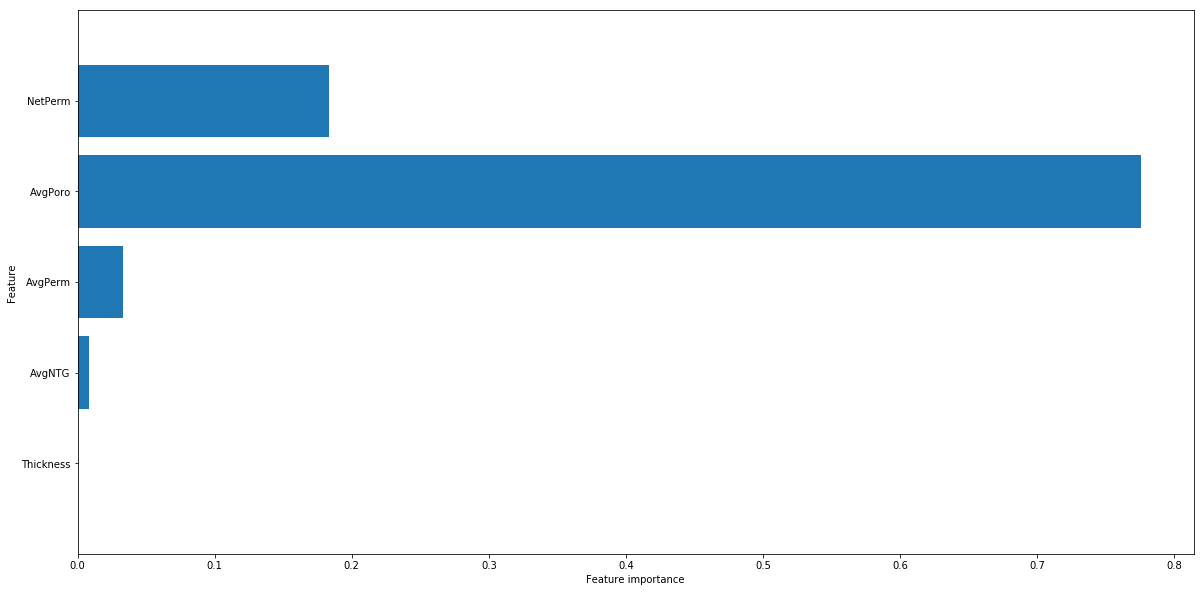

In [22]:
ssp.plot_feature_importances(clf,features)

maybe use
https://graphviz.gitlab.io/_pages/Download/Download_windows.html
to plot disision tree
(need some local path stuff setup, check with marco)

In [23]:
# Need to add path to graphviz for this cell to work
"""
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=features,  
                     class_names=['No well','Sweet Spot'],
                     filled=True, rounded=True,  
                      special_characters=True)  
graphviz.Source(dot_data)
"""

'\nimport os\nos.environ["PATH"] += os.pathsep + \'D:/Program Files (x86)/Graphviz2.38/bin/\'\nimport graphviz \n\ndot_data = tree.export_graphviz(clf, out_file=None, \n                     feature_names=features,  \n                     class_names=[\'No well\',\'Sweet Spot\'],\n                     filled=True, rounded=True,  \n                      special_characters=True)  \ngraphviz.Source(dot_data)\n'

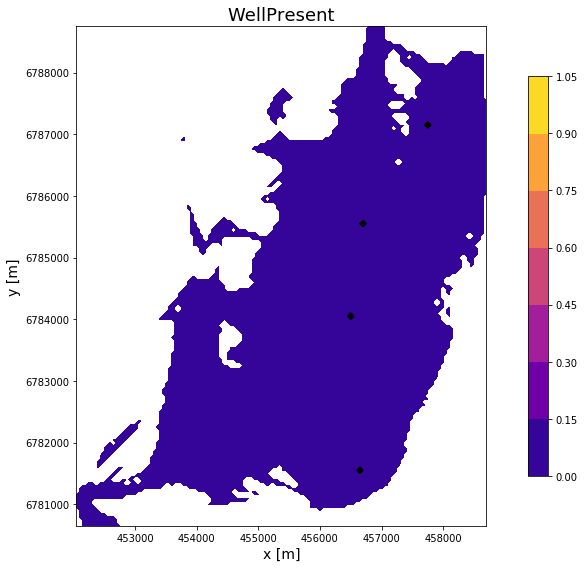

In [24]:
ssp.plot_map(df, label_clf)


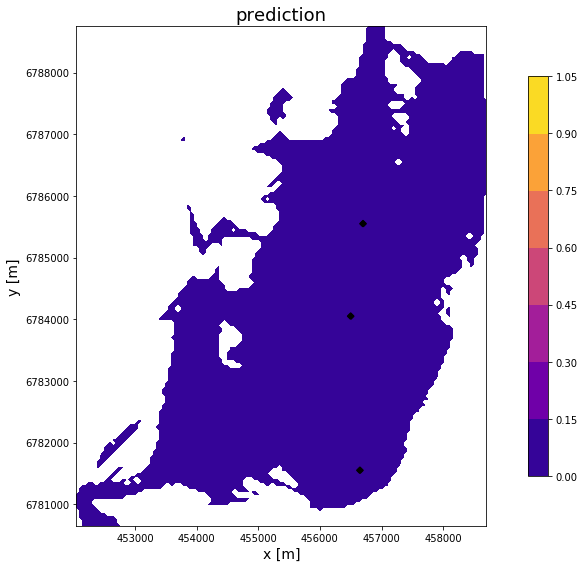

In [25]:
df['prediction'] = clf.predict(df[features])
ssp.plot_map(df, 'prediction')

# lets draw how certain the clasifications are

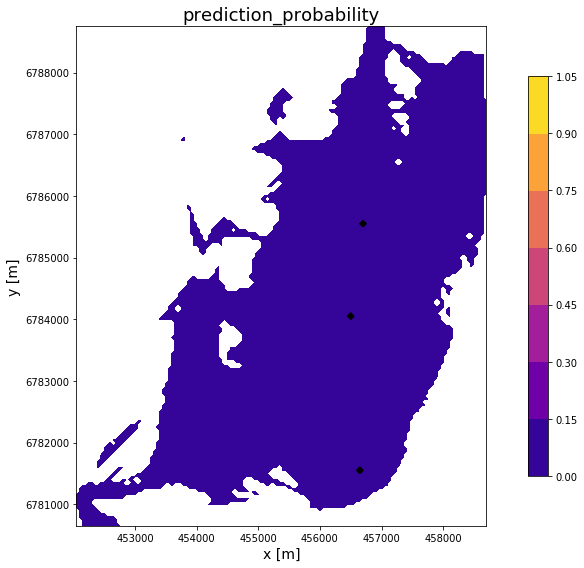

In [26]:
df['prediction_probability'] = clf.predict_proba(df[features])[:,1] # with 1 beeing the probability that there is a sweetspot
ssp.plot_map(df, 'prediction_probability')

# <a href="01 Data Preperation.ipynb">Previous</a> <a href="03 Exploration of models.ipynb">Next</a> Notebook